Logistic Regression is a **statistical model** used primarily for **binary classification tasks**. It predicts the probability that a given input belongs to a particular class, making it particularly useful when the output is categorical, like "yes or no," "success or failure," or "spam or not spam." Despite its name, logistic regression is a **classification algorithm**, not a regression algorithm.

---

### **Key Concepts of Logistic Regression**

1. **Logistic Function (Sigmoid Function):**
   - Logistic regression uses the sigmoid function to map predicted values (from \(-\infty\) to \(+\infty\)) to probabilities (between 0 and 1).
   - The sigmoid function is defined as:
     \[
     \sigma(z) = \frac{1}{1 + e^{-z}}
     \]
     where \(z = w^T x + b\), \(w\) is the weights vector, \(x\) is the input feature vector, and \(b\) is the bias term.

2. **Output Interpretation:**
   - The output of the sigmoid function is a probability:
     \[
     P(y=1|x) = \sigma(z)
     \]
   - If the probability is greater than a threshold (commonly 0.5), the model predicts the class as \(y=1\); otherwise, \(y=0\).

3. **Cost Function:**
   - Logistic regression uses the **log-loss (binary cross-entropy)** as its cost function:
     \[
     J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
     \]
     where:
     - \(m\): Number of training examples
     - \(y^{(i)}\): Actual label (0 or 1)
     - \(\hat{y}^{(i)}\): Predicted probability

4. **Training Process:**
   - The model learns parameters (\(w\) and \(b\)) using optimization techniques like **Gradient Descent** to minimize the cost function.

5. **Multiclass Classification (Extension):**
   - For multiclass classification, logistic regression can be extended using:
     - **One-vs-Rest (OvR):** Separate binary classifiers for each class.
     - **Softmax Regression:** Generalization of logistic regression to handle multiple classes.

---

### **Advantages:**
- Simple and easy to implement.
- Computationally efficient.
- Provides probabilities, which help in understanding model confidence.
- Performs well when the relationship between features and the target variable is approximately linear.

### **Limitations:**
- Assumes a linear relationship between the independent variables and the log-odds.
- Not suitable for complex relationships unless combined with feature engineering.
- Sensitive to outliers and irrelevant features.

---

### **Applications:**
- Email spam detection.
- Medical diagnosis (e.g., disease presence).
- Customer churn prediction.
- Fraud detection in banking.

Logistic regression is widely used as a baseline model due to its simplicity and interpretability.

In [69]:
import numpy as np           
import pandas as pd 
import matplotlib.pyplot as plt             


df = pd.read_csv('binary_classification_dataset.csv')
df.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.625100   1.678124   0.493516   1.290880  -1.114278   1.847020   
1  -0.064641   4.138629  -1.522415  -2.041705   2.116697   5.281310   
2   1.016313   2.665426  -0.628486  -0.886923   0.992518   1.942381   
3   1.037282   1.466618  -0.115420   1.170755  -1.458516   1.371440   
4   0.778385   1.565828  -1.724917  -2.735667   1.215107   1.231249   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   1.912294   1.357325   0.966041   -3.006921       1  
1   3.712587  -0.890254   1.438826   -3.623448       0  
2   1.855199  -1.958175  -0.348803   -1.598825       0  
3   1.000965  -1.034471  -1.654176   -2.936285       1  
4  -0.151824   0.598330  -0.524283    1.252909       0

In [70]:
class0  = (df['Target'] == 0).sum()
class1  = (df['Target'] == 1).sum()
print(class1)
print(class0)

503
497


In [71]:
df.isnull().sum()

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Target        0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   1000 non-null   float64
 1   Feature_2   1000 non-null   float64
 2   Feature_3   1000 non-null   float64
 3   Feature_4   1000 non-null   float64
 4   Feature_5   1000 non-null   float64
 5   Feature_6   1000 non-null   float64
 6   Feature_7   1000 non-null   float64
 7   Feature_8   1000 non-null   float64
 8   Feature_9   1000 non-null   float64
 9   Feature_10  1000 non-null   float64
 10  Target      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [73]:
df.describe()

Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.730472    -0.011035    -0.072376    -0.742447     0.719059   
std       1.863961     1.965723     1.024196     1.817695     1.787194   
min      -5.161168    -6.314203    -3.031194    -4.758034    -3.461769   
25%      -0.482462    -1.584057    -0.779532    -1.964883    -0.789202   
50%       1.033664     0.051065    -0.041891    -1.194817     1.025408   
75%       2.009441     1.480276     0.644444    -0.031715     1.947875   
max       5.566061     5.105669     3.276399     6.185693     6.536793   

         Feature_6    Feature_7    Feature_8    Feature_9   Feature_10  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.749845     0.697937     0.017115    -0.058077     0.956389   
std       1.894522     2.105735     1.029048     1.046402     3.510836   
min      -3.841477    -7.167910    -3.254479    -3.582063    -9.128397   
25%      -0.734119    -0.584799    -0.676648    -0.744499    -1.392688   
50%       0.901614     0.852704     0.025772    -0.081367     1.446436   
75%       2.031734     2.050272     0.679153     0.659029     3.169381   
max       6.108412     7.979264     3.089890     2.986329     9.385687   

            Target  
count  1000.000000  
mean      0.503000  
std       0.500241  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

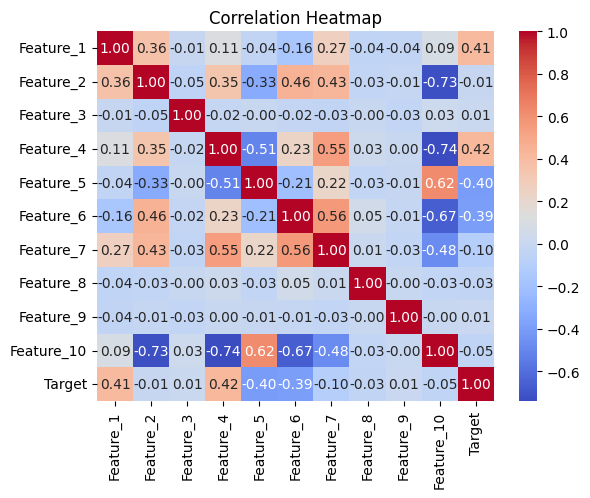

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


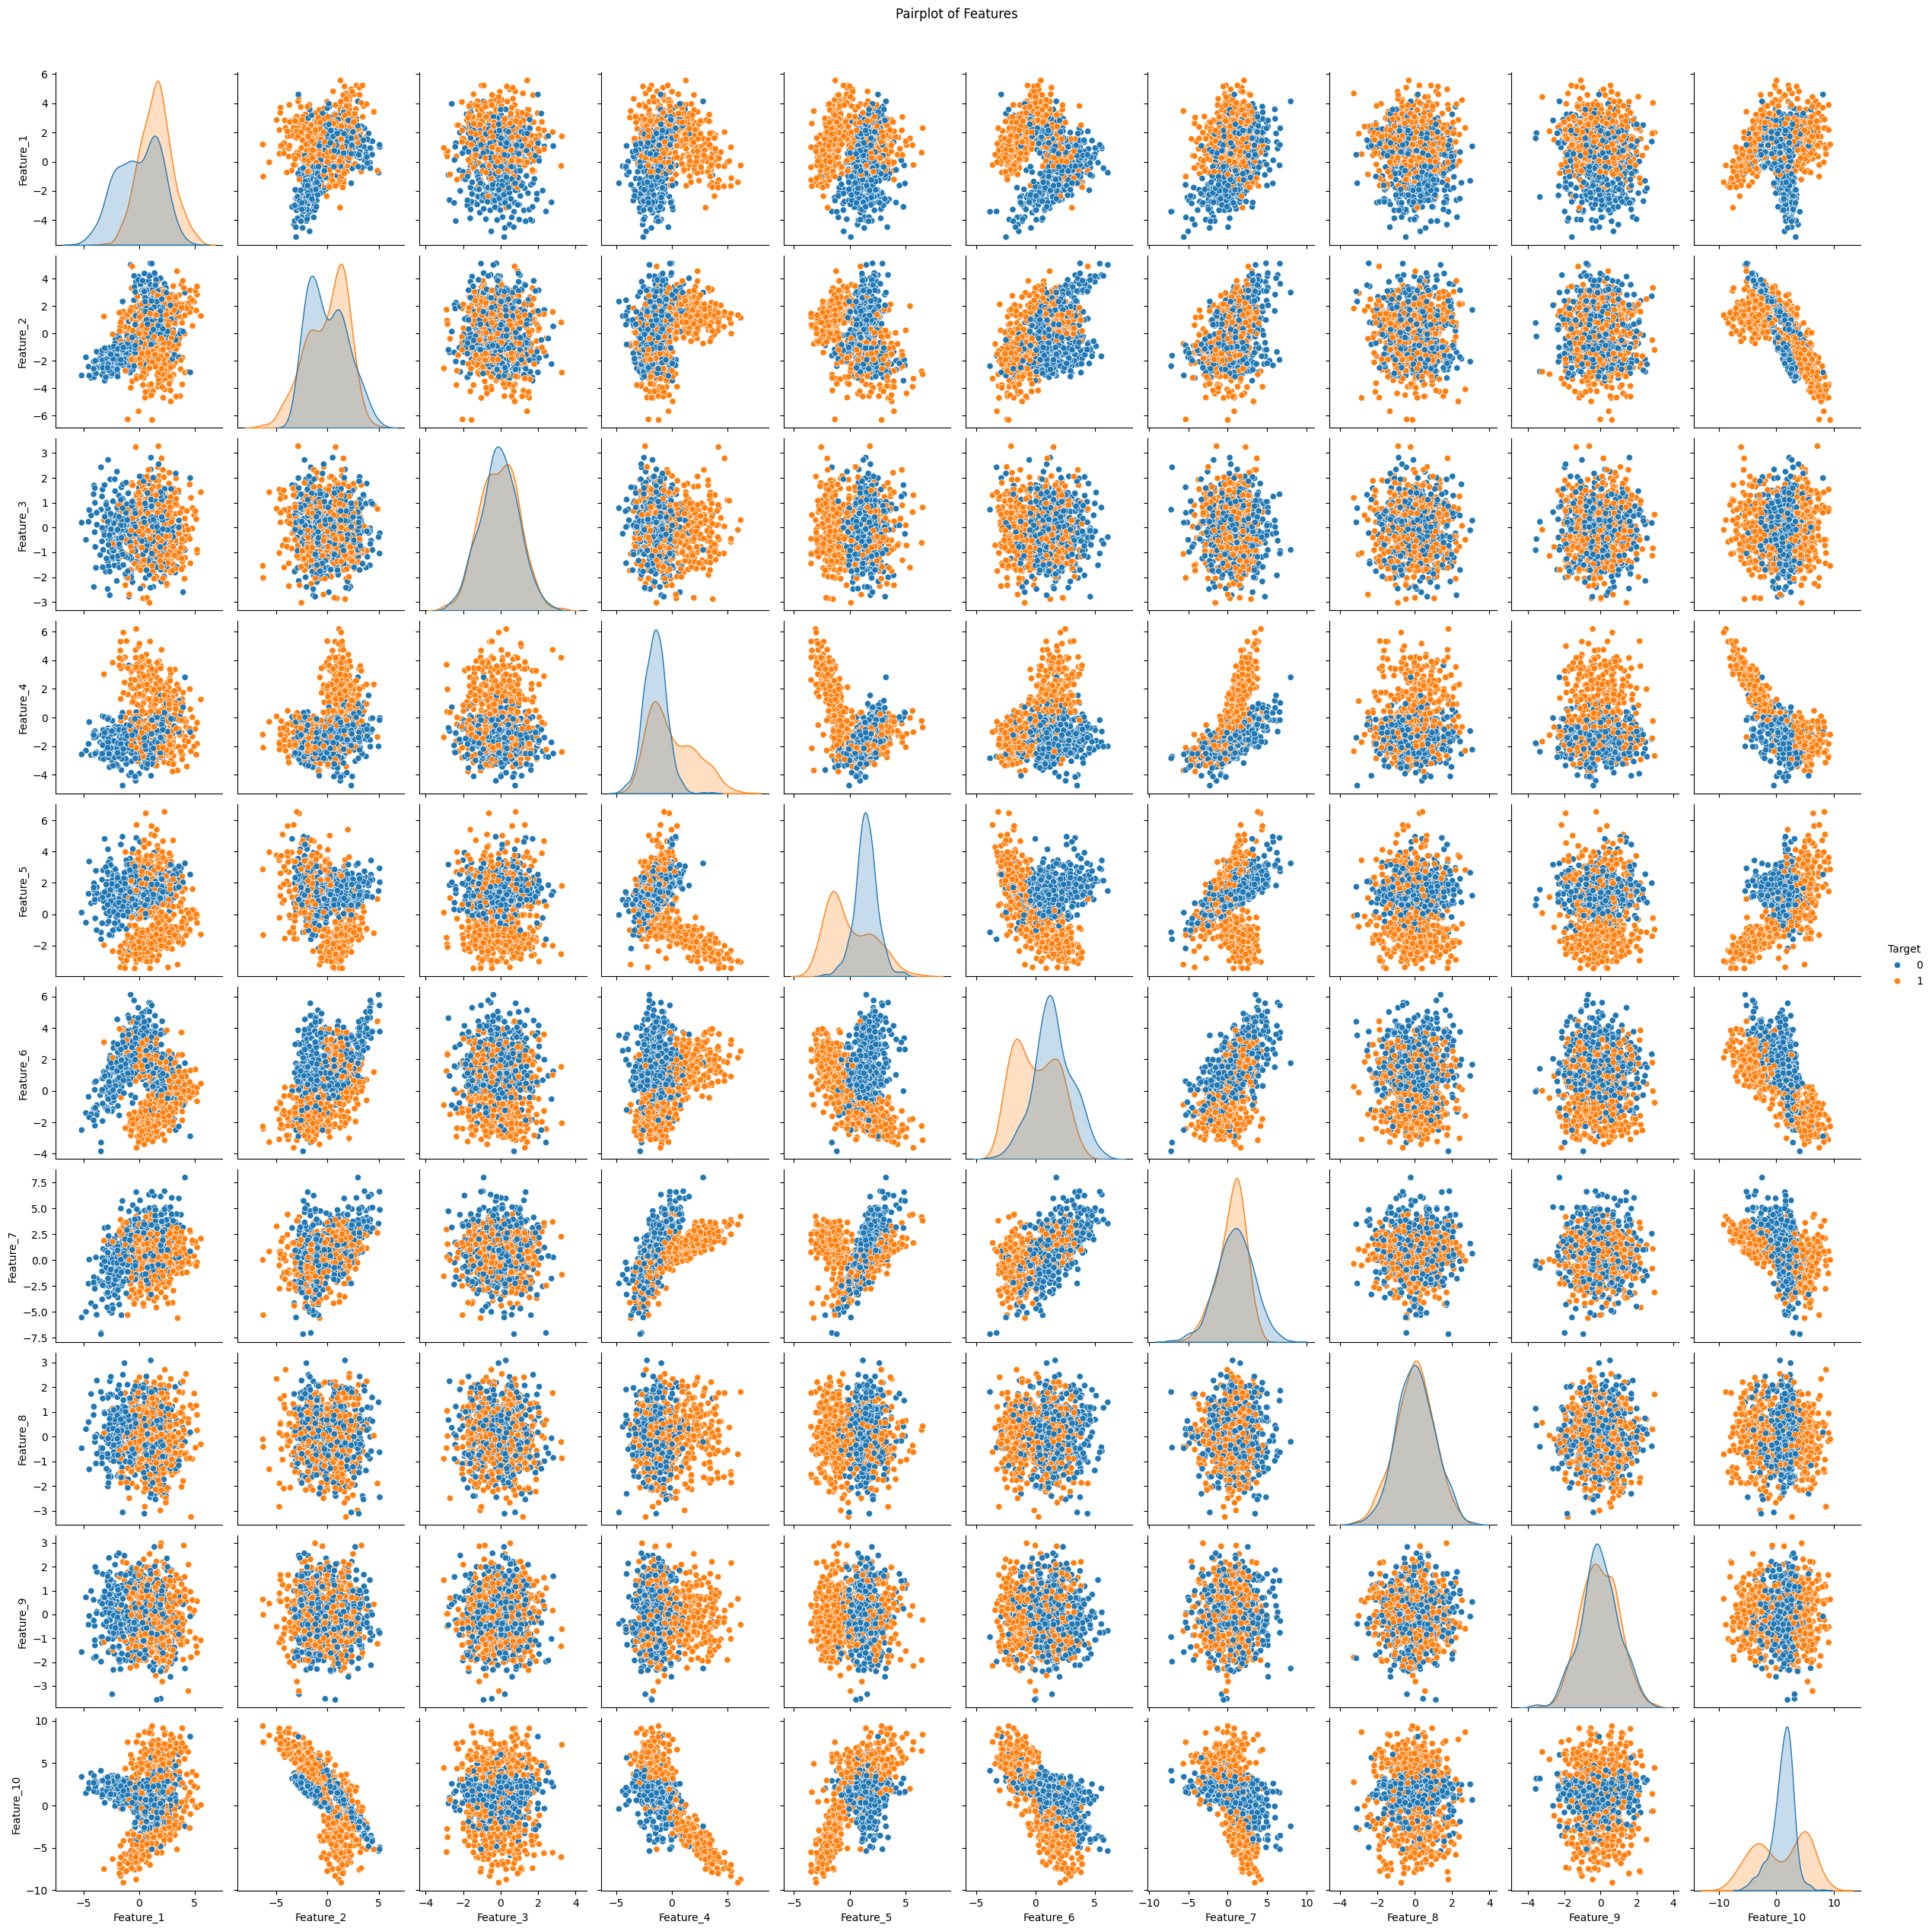

In [75]:
sns.pairplot(df, hue="Target", diag_kind="kde")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


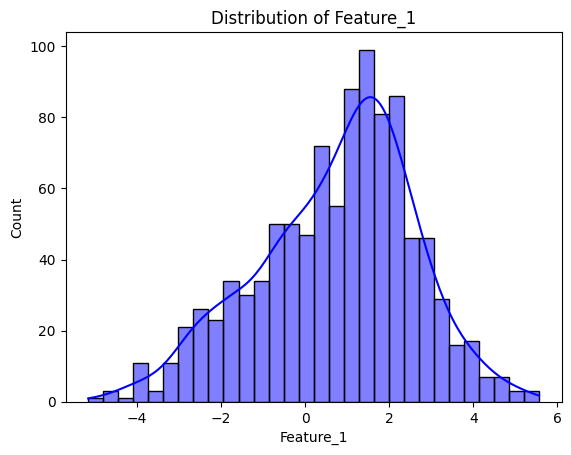

In [76]:
sns.histplot(df["Feature_1"], kde=True, bins=30, color="blue")
plt.title("Distribution of Feature_1")
plt.show()


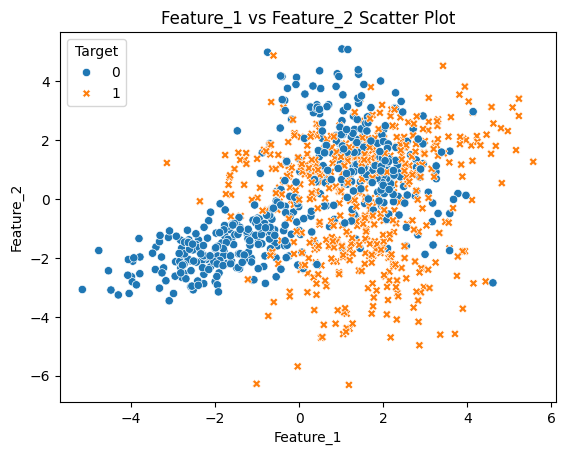

In [77]:
sns.scatterplot(data=df, x="Feature_1", y="Feature_2", hue="Target", style="Target")
plt.title("Feature_1 vs Feature_2 Scatter Plot")
plt.show()


C:\Users\Kirit\AppData\Local\Temp\ipykernel_11484\647408641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Target", y="Feature_3", palette="muted")


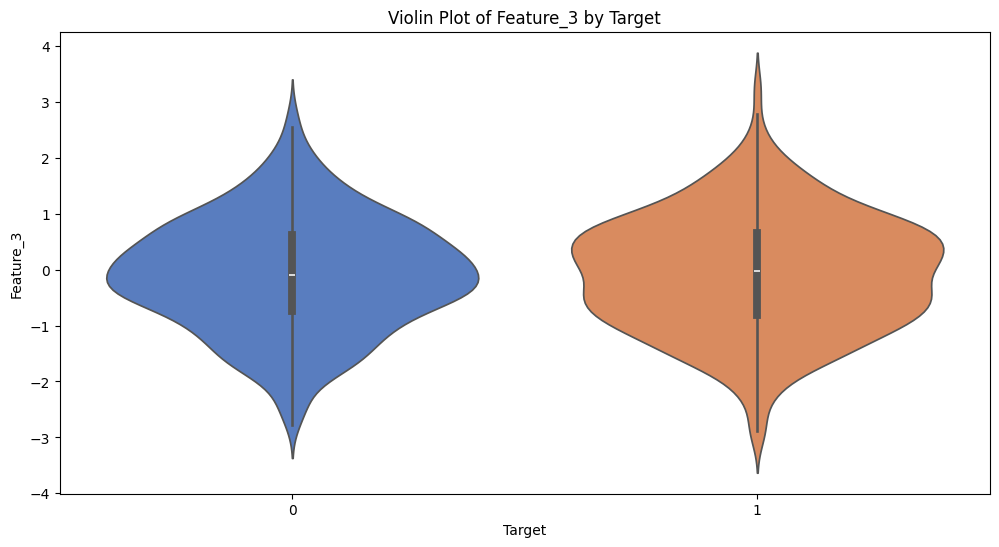

In [78]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Target", y="Feature_3", palette="muted")
plt.title("Violin Plot of Feature_3 by Target")
plt.show()


C:\Users\Kirit\AppData\Local\Temp\ipykernel_11484\2380152079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=df, palette="pastel")


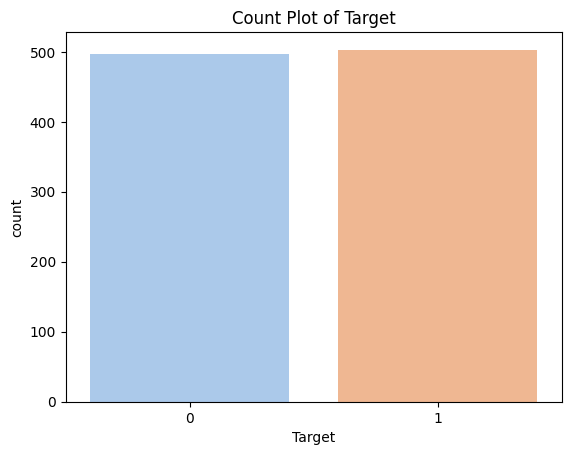

In [79]:
sns.countplot(x="Target", data=df, palette="pastel")
plt.title("Count Plot of Target")
plt.show()


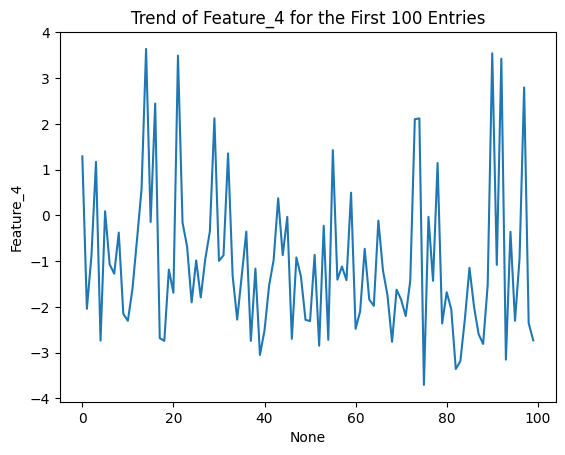

In [80]:
sns.lineplot(data=df.head(100), x=df.index[:100], y="Feature_4")
plt.title("Trend of Feature_4 for the First 100 Entries")
plt.show()


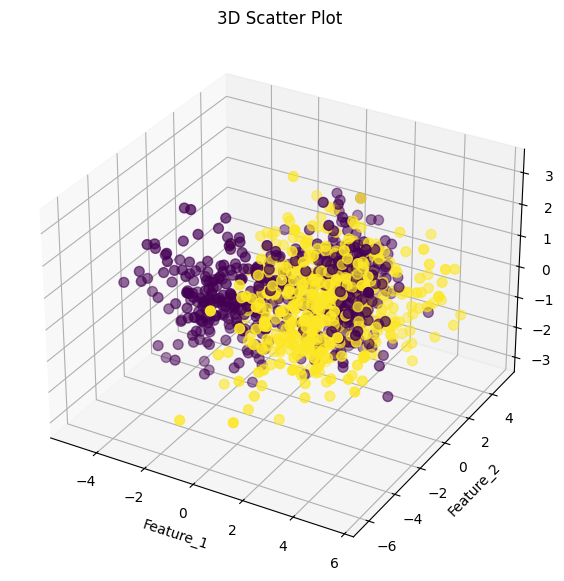

In [81]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Feature_1"], df["Feature_2"], df["Feature_3"], c=df["Target"], cmap='viridis', s=50)
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")
ax.set_zlabel("Feature_3")
plt.title("3D Scatter Plot")
plt.show()


In [82]:
from sklearn.model_selection import train_test_split


In [83]:
X = df.drop("Target" , axis = 1)
y = df = df['Target']

In [84]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 42)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [86]:
from sklearn.linear_model import LogisticRegression


In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model coefficients: [[ 1.38128185 -0.62814676  0.04169233  1.96017301 -1.44789606 -1.85208614
  -0.30559323 -0.15491994  0.08604447  0.00231102]]
Intercept: [-0.06055114]


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


y_true = y_test  
y_pred = model.predict(X_test)  


accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")


precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")


recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")


f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")


conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Accuracy: 0.94
Precision: 0.94
Recall: 0.92
F1 Score: 0.93
Confusion Matrix:
[[107   5]
 [  7  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       112
           1       0.94      0.92      0.93        88

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [89]:
from sklearn.decomposition import PCA
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [90]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Number of components selected: {pca.n_components_}")


X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

Explained Variance Ratio: [0.34019839 0.13978694 0.11377814 0.1034619  0.100512   0.09418167
 0.07390426]
Number of components selected: 7


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the model
model = LogisticRegression()

# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': [0.1, 1, 10], 'max_iter': [100, 200]},
    {'penalty': ['l2', 'elasticnet'], 'solver': ['saga'], 'C': [0.1, 1, 10], 'max_iter': [100, 200], 'l1_ratio': [0.1, 0.5, 0.7]}
]

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9037499999999999
